In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
pathTrain='/content/gdrive/MyDrive/CV_Final_Project/BU3DFE-P2/'

In [3]:
import os
all_images  = []
lable     = []
subjects    = os.listdir(pathTrain)
subjects[0] = "0"
subjects[1] = "1"
subjects[2] = "2"
subjects[3] = "3"
subjects[4] = "4"
subjects[5] = "5"
subjects[6] = "6"
num_classes = len(subjects)
print(subjects)
print(num_classes)
size = 152

['0', '1', '2', '3', '4', '5', '6']
7


In [4]:
#Load all image
import cv2
for number1 in range(0,num_classes):
    print(number1)
    path = (pathTrain + subjects[number1] + '/')
    files = os.listdir(path)
    numberOfsamples = len(files)
    for number2 in range(0, numberOfsamples):
        pathImg = path + files[number2]
        img = cv2.imread(pathImg)
        img = cv2.resize(img, (size,size), interpolation = cv2.INTER_AREA)
        img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        all_images.append(img)
        lable.append(int(number1))
        
    print(numberOfsamples)

0
500
1
500
2
500
3
500
4
500
5
500
6
500


In [5]:
#Split Train Test Data
import numpy as np 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(all_images,lable, test_size=0.2 ,shuffle=True)


In [6]:
#Data Augmentation
import cv2
import imutils
import tensorflow as tf

for i in range(0,len(X_train)):
    img=X_train[i]

    cropped_image = img
    cropped_image = cropped_image[15:size-15, 15:size-15]
    cropped_image = cv2.resize(cropped_image, (size,size), interpolation = cv2.INTER_AREA)
    X_train.append(cropped_image)

    flip_1 = cv2.flip(img, 1)
    X_train.append(flip_1)

    lighter = img
    lighter = (((lighter / 255.)**(1/2))*255)
    X_train.append(lighter)

    darker = img
    darker = (((darker / 255.)**(1/0.5))*255)
    X_train.append(darker)

    rot35  = imutils.rotate(img,angle=35)
    X_train.append(rot35)

    rot325  = imutils.rotate(img,angle=325)
    X_train.append(rot325)



    Y_train.append(int(Y_train[i])) 
    Y_train.append(int(Y_train[i])) 
    Y_train.append(int(Y_train[i])) 
    Y_train.append(int(Y_train[i])) 
    Y_train.append(int(Y_train[i]))         
    Y_train.append(int(Y_train[i])) 



(19600, 152, 152)
2
19600


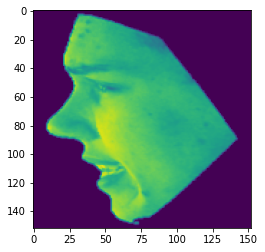

In [7]:
import numpy as np
X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype=np.uint16) 
print(X_train.shape)
import matplotlib.pyplot as plt
plt.imshow(X_train[3000])
print(Y_train[3000])
print(len(Y_train))

(700, 152, 152)
4
700


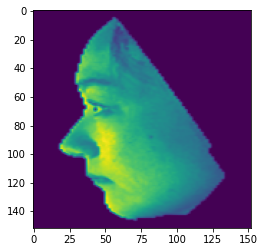

In [8]:
X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype=np.uint16) 
print(X_test.shape)
import matplotlib.pyplot as plt
plt.imshow(X_test[600])
print(Y_test[600])
print(len(Y_test))

In [9]:
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Y_train = to_categorical(Y_train,num_classes)
Y_test  = to_categorical(Y_test,num_classes)

X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')


X_train   /= 255.
X_test    /= 255.



In [10]:
#MODEL
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import os

from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model = Sequential()


model.add(Conv2D(32,(11,11), padding='same', kernel_initializer='he_normal', input_shape=(size,size,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(32,(7,7), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(32,(7,7), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(64,(5,5), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(64,(5,5), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(512, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 152, 152, 32)      3904      
                                                                 
 activation (Activation)     (None, 152, 152, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 152, 152, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 76, 76, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 76, 76, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
history=model.fit(X_train, Y_train, 
          validation_data=(X_test,Y_test),
          shuffle=True,
          epochs=100,
          batch_size=32)

Epoch 1/100
613/613 [==============================] - 81s 123ms/step - loss: 2.0265 - accuracy: 0.3192 - val_loss: 1.1616 - val_accuracy: 0.5329
Epoch 2/100
613/613 [==============================] - 74s 120ms/step - loss: 1.1732 - accuracy: 0.5537 - val_loss: 0.9306 - val_accuracy: 0.6371
Epoch 3/100
613/613 [==============================] - 74s 120ms/step - loss: 0.8908 - accuracy: 0.6587 - val_loss: 0.8485 - val_accuracy: 0.6957
Epoch 4/100
613/613 [==============================] - 73s 120ms/step - loss: 0.7574 - accuracy: 0.7080 - val_loss: 0.6099 - val_accuracy: 0.7557
Epoch 5/100
613/613 [==============================] - 74s 120ms/step - loss: 0.6583 - accuracy: 0.7520 - val_loss: 0.6074 - val_accuracy: 0.7571
Epoch 6/100
613/613 [==============================] - 73s 120ms/step - loss: 0.6049 - accuracy: 0.7722 - val_loss: 1.5098 - val_accuracy: 0.4686
Epoch 7/100
613/613 [==============================] - 74s 120ms/step - loss: 0.5584 - accuracy: 0.7909 - val_loss: 0.5314 -

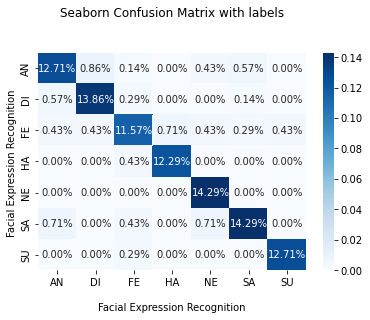

In [12]:
# Evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred = model.predict(X_test)
Y_pred=np.argmax(Y_pred, axis=1)
Y_test=np.argmax(Y_test, axis=1)

cf_matrix = confusion_matrix(Y_test, Y_pred)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nFacial Expression Recognition')
ax.set_ylabel('Facial Expression Recognition ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['AN','DI', 'FE', 'HA' ,'NE', 'SA', 'SU'])
ax.yaxis.set_ticklabels(['AN','DI', 'FE', 'HA' ,'NE', 'SA', 'SU'])

## Display the visualization of the Confusion Matrix.
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


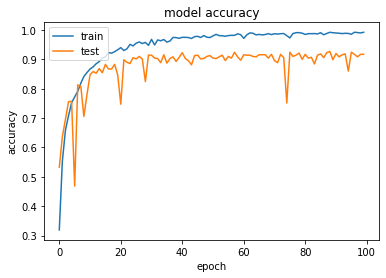

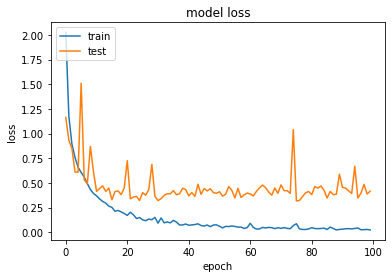

In [13]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/gdrive/MyDrive/saveModel/model.h5') 

In [ ]:
#new_model =tf.keras.models.load_model('/content/drive/MyDrive/saveModel/model.h5')
#new_model.summary()

In [ ]:
imgtest=np.zeros((1,50,50,3))
imgtest[0,:,:,:]=X_test[300,:,:,:]
prediction=model.predict(imgtest)
print(prediction)